# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [11]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [12]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [13]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [14]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [15]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [16]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [17]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.521478295 W= 0.6221493 b= -1.8786726
Epoch: 0100 cost= 0.470148414 W= 0.59999174 b= -1.7192734
Epoch: 0150 cost= 0.424743801 W= 0.5791517 b= -1.5693523
Epoch: 0200 cost= 0.384581864 W= 0.5595519 b= -1.4283508
Epoch: 0250 cost= 0.349056304 W= 0.54111713 b= -1.2957331
Epoch: 0300 cost= 0.317632020 W= 0.5237787 b= -1.1710018
Epoch: 0350 cost= 0.289836615 W= 0.5074719 b= -1.0536915
Epoch: 0400 cost= 0.265250087 W= 0.49213466 b= -0.9433568
Epoch: 0450 cost= 0.243502364 W= 0.4777095 b= -0.83958346
Epoch: 0500 cost= 0.224265829 W= 0.46414235 b= -0.7419822
Epoch: 0550 cost= 0.207250580 W= 0.45138216 b= -0.6501861
Epoch: 0600 cost= 0.192200035 W= 0.43938068 b= -0.5638486
Epoch: 0650 cost= 0.178887576 W= 0.42809322 b= -0.48264685
Epoch: 0700 cost= 0.167112634 W= 0.41747698 b= -0.40627477
Epoch: 0750 cost= 0.156697452 W= 0.40749222 b= -0.33444482
Epoch: 0800 cost= 0.147485062 W= 0.3981011 b= -0.2668862
Epoch: 0850 cost= 0.139336780 W= 0.38926873 b= -0.20334627
Epoch: 0900 cost

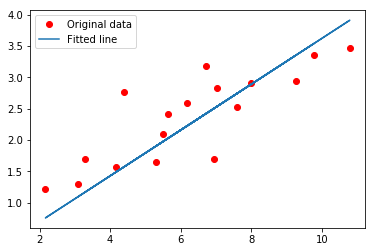

In [19]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [20]:
# Regression result